# Data Retrieval

In [ ]:
pip install sodapy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
# Load the dataset
csv_df = pd.read_csv('/content/DOHMH_New_York_City_Restaurant_Inspection_Results_20251207.csv',
                     quotechar='"', low_memory=False)
print(csv_df.shape)
print(csv_df.info())

(292727, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292727 entries, 0 to 292726
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  292727 non-null  int64  
 1   DBA                    292724 non-null  object 
 2   BORO                   292727 non-null  object 
 3   BUILDING               290648 non-null  object 
 4   STREET                 292711 non-null  object 
 5   ZIPCODE                289117 non-null  float64
 6   PHONE                  292720 non-null  object 
 7   CUISINE DESCRIPTION    288774 non-null  object 
 8   INSPECTION DATE        292727 non-null  object 
 9   ACTION                 288774 non-null  object 
 10  VIOLATION CODE         286499 non-null  object 
 11  VIOLATION DESCRIPTION  286499 non-null  object 
 12  CRITICAL FLAG          292727 non-null  object 
 13  SCORE                  276237 non-null  float64
 14  GRADE                  

In [ ]:
# Source: NYC Open Data API example from https://dev.socrata.com/foundry/data.cityofnewyork.us/43nn-pn8j

#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofnewyork.us,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("43nn-pn8j", limit=2000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [ ]:
# Modify example to get all rows
limit = 50000
offset = 0
all_results = []

while True:
    print(f"Getting rows {offset} - {offset + limit}")
    batch = client.get("43nn-pn8j", limit=limit, offset=offset)

    if not batch:
        print("Returned all data")
        break

    all_results.extend(batch)
    offset += limit

    if len(batch) < limit:
        print(f"Final batch ({len(batch)} rows)")
        break

df = pd.DataFrame.from_records(all_results)
print(df.shape)
print(df.info())

Getting rows 0 - 50000
Getting rows 50000 - 100000
Getting rows 100000 - 150000
Getting rows 150000 - 200000
Getting rows 200000 - 250000
Getting rows 250000 - 300000
Final batch (42727 rows)
(292727, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292727 entries, 0 to 292726
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   camis                        292727 non-null  object
 1   dba                          292727 non-null  object
 2   boro                         292727 non-null  object
 3   street                       292711 non-null  object
 4   phone                        292720 non-null  object
 5   inspection_date              292727 non-null  object
 6   critical_flag                292727 non-null  object
 7   record_date                  292727 non-null  object
 8   building                     290648 non-null  object
 9   zipcode                      289117 non-n

In [ ]:
# remove computed columns that are not in CSV file
computed_cols = [col for col in df.columns if col.startswith(":@computed_region")]
df.drop(columns=computed_cols, inplace=True, errors='ignore')
# verify the shapes are the same in CSV vs. API
print(df.shape)

(292727, 27)


In [ ]:
# Example data
print(f"Initial shape (Each row is a Restaurant Citations): {df.shape}")
print("Columns:", df.columns.tolist())
print(df.info())
print(df.head(3))

Initial shape (Each row is a Restaurant Citations): (292727, 27)
Columns: ['camis', 'dba', 'boro', 'street', 'phone', 'inspection_date', 'critical_flag', 'record_date', 'building', 'zipcode', 'latitude', 'longitude', 'community_board', 'council_district', 'census_tract', 'bin', 'bbl', 'nta', 'location', 'cuisine_description', 'action', 'violation_code', 'violation_description', 'score', 'inspection_type', 'grade', 'grade_date']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292727 entries, 0 to 292726
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   camis                  292727 non-null  object
 1   dba                    292727 non-null  object
 2   boro                   292727 non-null  object
 3   street                 292711 non-null  object
 4   phone                  292720 non-null  object
 5   inspection_date        292727 non-null  object
 6   critical_flag          292727 non-nu

# Data Cleaning

In [ ]:
print("Missing Values % of overall")
print((df.isnull().mean() * 100).sort_values(ascending=False))

Missing Values % of overall
grade_date               53.699864
grade                    51.157563
score                     5.633235
violation_description     2.127580
violation_code            2.127580
bin                       1.955406
nta                       1.530436
community_board           1.530436
council_district          1.517796
census_tract              1.517796
cuisine_description       1.350405
inspection_type           1.350405
action                    1.350405
zipcode                   1.233231
location                  1.233231
bbl                       0.761460
building                  0.710218
latitude                  0.464255
longitude                 0.464255
street                    0.005466
phone                     0.002391
record_date               0.000000
critical_flag             0.000000
dba                       0.000000
camis                     0.000000
inspection_date           0.000000
boro                      0.000000
dtype: float64


In [ ]:
# missing data info
print("Missing values (%):")
print((df.isna().sum() / len(df) * 100).sort_values(ascending=False))

Missing values (%):
grade_date               53.699864
grade                    51.157563
score                     5.633235
violation_description     2.127580
violation_code            2.127580
bin                       1.955406
nta                       1.530436
community_board           1.530436
council_district          1.517796
census_tract              1.517796
cuisine_description       1.350405
inspection_type           1.350405
action                    1.350405
zipcode                   1.233231
location                  1.233231
bbl                       0.761460
building                  0.710218
latitude                  0.464255
longitude                 0.464255
street                    0.005466
phone                     0.002391
record_date               0.000000
critical_flag             0.000000
dba                       0.000000
camis                     0.000000
inspection_date           0.000000
boro                      0.000000
dtype: float64


In [ ]:
# determin columns type based on Columns in https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/43nn-pn8j/about_data
date_cols = ["inspection_date", "grade_date", "record_date"]

numeric_cols = ["score", "latitude", "longitude"]

text_cols = ["dba", "camis", "boro", "building", "street", "phone", "zipcode", "cuisine_description",
             "action", "violation_code", "violation_description", "critical_flag", "grade", "inspection_type",
             "community_board", "council_district", "census_tract", "nta", "location"]

In [ ]:
# clean up invalid rows where BORO = 0 (not in NYC)
invalid_boro_count = (df["boro"] == "0").sum()
print(f"Rows with invalid BORO: {invalid_boro_count:,}")
df = df[df["boro"] != "0"].copy()
print(df.shape) #after clean up

Rows with invalid BORO: 16
(292711, 27)


In [ ]:
# standardize date columns
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors="coerce")
        print(f"Null in {col} after standardization: {df[col].isna().sum()}")

Null in inspection_date after standardization: 0
Null in grade_date after standardization: 157178
Null in record_date after standardization: 0


In [ ]:
# create additional date columns for analysis
df["inspection_year"] = df["inspection_date"].dt.year
df["inspection_month"] = df["inspection_date"].dt.month
df["inspection_season"] = pd.cut(df["inspection_date"].dt.month,
    bins=[0, 2, 5, 8, 11, 12],
    labels=["Winter", "Spring", "Summer", "Fall", "Winter"],
    right=True,
    ordered=False)
print(df[["inspection_date", "inspection_year", "inspection_month", "inspection_season"]].head())

  inspection_date  inspection_year  inspection_month inspection_season
0      1900-01-01             1900                 1            Winter
1      1900-01-01             1900                 1            Winter
2      1900-01-01             1900                 1            Winter
3      1900-01-01             1900                 1            Winter
4      1900-01-01             1900                 1            Winter


In [ ]:
from datetime import date

df["inspection_date"] = df["inspection_date"].dt.date

bad_dates = df[(df["inspection_date"] == date(1900, 1, 1))]
print(f"Rows with inspection_date = 1900-01-01: {len(bad_dates)}")
bad_dates.head()

Rows with inspection_date = 1900-01-01: 3937


,camis,dba,boro,street,phone,inspection_date,critical_flag,record_date,building,zipcode,...,action,violation_code,violation_description,score,inspection_type,grade,grade_date,inspection_year,inspection_month,inspection_season
0,50150804,SOLEIL BRASSERIE (CONNECTOR LEVEL),Queens,AIRPORT,2159970667,1900-01-01,Not Applicable,2025-12-05 06:00:23,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1900,1,Winter
1,50142985,Respite Center at the Holiday Inn,Manhattan,WASHINGTON STREET,3479408017,1900-01-01,Not Applicable,2025-12-05 06:00:23,99,10006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1900,1,Winter
2,50164043,JACOBS PICKLES,Queens,INTERNATIONAL AIRPORT TERMINAL 5,7037237264,1900-01-01,Not Applicable,2025-12-05 06:00:23,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1900,1,Winter
3,50126573,NEW BLUE SPACE INC,Manhattan,42 STREET,7187901106,1900-01-01,Not Applicable,2025-12-05 06:00:23,42W,10036,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1900,1,Winter
4,50157054,SOUL SISTER QUISINE LLC,Brooklyn,UTICA AVENUE,3474391552,1900-01-01,Not Applicable,2025-12-05 06:00:23,1140,11203,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1900,1,Winter


In [ ]:
df["record_date"] = df["record_date"].dt.date

same_dates = df[(df["inspection_date"] == date(1900, 1, 1)) &
                (df["record_date"] == date(2025, 10, 27))]
print(f"Rows with record_date = today : {len(same_dates)}")

# drop all the data today since inception date is invalid
df = df[df["inspection_date"] != date(1900, 1, 1)]
df.shape

Rows with record_date = today : 0


(288774, 30)

In [ ]:
# clean up text columns
def clean_text(x):
    if pd.isna(x):
        return np.nan
    x = str(x).strip()  # remove leading/trailing spaces
    x = re.sub(r'\s+', ' ', x)  # remove multiple spaces
    x = re.sub(r'[^\w\s&\'/.\-]', '', x)  # remove special characters
    return x

for col in text_cols:
    if col in df.columns:
        before_unique = df[col].astype(str).nunique(dropna=True)
        df[col] = df[col].apply(clean_text)
        after_unique = df[col].astype(str).nunique(dropna=True)
        print(f"{col} reduced from {before_unique} to {after_unique}")

dba reduced from 21021 to 21008
camis reduced from 26632 to 26632
boro reduced from 5 to 5
building reduced from 8015 to 8015
street reduced from 1897 to 1896
phone reduced from 24386 to 24386
zipcode reduced from 220 to 220
cuisine_description reduced from 90 to 90
action reduced from 5 to 5
violation_code reduced from 151 to 151
violation_description reduced from 227 to 207
critical_flag reduced from 3 to 3
grade reduced from 7 to 7
inspection_type reduced from 34 to 34
community_board reduced from 68 to 68
council_district reduced from 52 to 52
census_tract reduced from 1176 to 1176
nta reduced from 194 to 194
location reduced from 22493 to 22493


# Data Analysis

## Exploratory Data Analysis (EDA)

In [ ]:
num_restaurants = df["camis"].nunique()
print(f"Number of unique restaurants: {num_restaurants}")

Number of unique restaurants: 26632


In [ ]:
restaurants_per_boro = df.groupby("boro")["camis"].nunique().sort_values(ascending=False)
print(f"Number of unique restaurants per borough: {restaurants_per_boro}")

Number of unique restaurants per borough: boro
Manhattan        10411
Brooklyn          6807
Queens            6103
Bronx             2335
Staten Island      976
Name: camis, dtype: int64


In [ ]:
inspections_per_boro = df.groupby("boro")["camis"].count().sort_values(ascending=False)
print(f"Number of inspections per borough: {inspections_per_boro}")

Number of inspections per borough: boro
Manhattan        106750
Brooklyn          74015
Queens            71514
Bronx             26621
Staten Island      9874
Name: camis, dtype: int64


In [ ]:
cuisine_counts = df.groupby("cuisine_description")["camis"].count()
top10_cuisines = cuisine_counts.sort_values(ascending=False).head(10)
print(f"Top 10 cuisine types by number of inspections: {top10_cuisines}")

Top 10 cuisine types by number of inspections: cuisine_description
American                    45351
Chinese                     28819
Coffee/Tea                  20361
Pizza                       17308
Latin American              13564
Mexican                     12031
Bakery Products/Desserts    11359
Caribbean                   10995
Japanese                    10334
Italian                      9568
Name: camis, dtype: int64


## Borough-level Comparison: How do food safety results differ in the five boroughs?

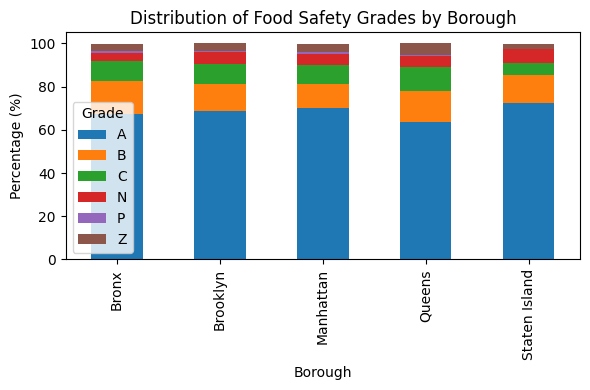

In [ ]:
# Compare letter grade distribution
grade_dist = (df.groupby("boro")["grade"].value_counts(normalize=True)
      .rename("%").mul(100).round(1).reset_index())

pivot_df = grade_dist.pivot(index="boro", columns="grade", values="%").fillna(0)

pivot_df = pivot_df.reindex(sorted(pivot_df.columns), axis=1)

pivot_df.plot(kind="bar", stacked=True, figsize=(6, 4))

plt.title("Distribution of Food Safety Grades by Borough")
plt.xlabel("Borough")
plt.ylabel("Percentage (%)")
plt.legend(title="Grade")
plt.tight_layout()
plt.show()

This graph reveals that Queens has the lowest percentage of A ratings and also the highest percentage of ungraded restaurants. This is surprising since from the exploratory analysis earlier, Manhattan has the highest number of restaurants and inspections, followed by Brooklyn, then Queens.

In terms of demographic data from https://popfactfinder.planning.nyc.gov/explorer/cities/NYC, Queens has the second-highest population, following Brooklyn among the five boroughs. However, it also has the second-highest median age (39.1 years vs. 36.8 years for NYC). Queens is also widely viewed as the most culturally diverse county in the U.S., and the combination of high median age and population indicates that Queens might have a higher number of small, independent, immigrant-owned restaurants. These establishments often operate in older, smaller kitchens, which could contribute to the lowest percentage of A rating.

In [ ]:
# Compare critical vs. non-critical violation distribution
critical_flag_summary = (df.groupby("boro")["critical_flag"].value_counts(normalize=True)
     .rename("%").mul(100).round(1).reset_index())

print("Critical flag distribution by borough:")
print(critical_flag_summary)

Critical flag distribution by borough:
             boro   critical_flag     %
0           Bronx        Critical  52.9
1           Bronx    Not Critical  46.0
2           Bronx  Not Applicable   1.1
3        Brooklyn        Critical  53.9
4        Brooklyn    Not Critical  44.8
5        Brooklyn  Not Applicable   1.3
6       Manhattan        Critical  52.8
7       Manhattan    Not Critical  45.6
8       Manhattan  Not Applicable   1.7
9          Queens        Critical  54.2
10         Queens    Not Critical  44.5
11         Queens  Not Applicable   1.3
12  Staten Island        Critical  55.4
13  Staten Island    Not Critical  43.8
14  Staten Island  Not Applicable   0.7


Looking within the violation, all boroughs have around 52-54% of critical (violations are those most likely to contribute to food-borne illness) vs. non-critical violations, so it does not appear that a specific borough has worse violations.

In [ ]:
# Count violations per inspection event
violations_per_inspection = (df.groupby(["boro", "camis", "inspection_date"]).size()
      .groupby("boro").mean().round(2))

print("Average number of violations per inspection:")
print(violations_per_inspection)


Average number of violations per inspection:
boro
Bronx            3.48
Brooklyn         3.40
Manhattan        3.38
Queens           3.68
Staten Island    3.24
dtype: float64


When looking at how many violations are issued per inspection on average, Queens also has the highest average number of violations. This is consistent with previous analysis that shows Queens has the lowest percentage of A ratings.

## Violation patterns: Do restaurants generally improve after multiple inspections?

In [ ]:
# only keep restaurants with grades and convert A/B/C to numeric scores for comparison
df['valid_grade'] = (df['grade'].astype(str).str.upper().str.strip())
valid_grades = {'A', 'B', 'C'}
df_clean = df[df['valid_grade'].isin(valid_grades)].copy()

grade_map = {'A': 1, 'B': 2, 'C': 3}
df_clean['grade_numeric'] = df_clean['valid_grade'].map(grade_map)

In [ ]:
# order inspections per restaurant to measure improvement
df_clean = df_clean.sort_values(['camis', 'inspection_date'])
df_clean['inspection_num'] = df_clean.groupby('camis').cumcount() + 1

In [ ]:
# Compute grade difference between two consecutive inspections

# shift grade by previous inspection
df_clean['prev_grade_numeric'] = df_clean.groupby('camis')['grade_numeric'].shift(1)

# compute grade change
df_clean['grade_change'] = df_clean['grade_numeric'] - df_clean['prev_grade_numeric']

# keep only rows with a previous inspection
df_change = df_clean.dropna(subset=['prev_grade_numeric']).copy()

print(df_change[['camis', 'inspection_num', 'prev_grade_numeric', 'grade_numeric', 'grade_change']].head())


           camis  inspection_num  prev_grade_numeric  grade_numeric  \
24778   30075445               2                 1.0              1   
218437  30075445               3                 1.0              1   
74247   30075445               4                 1.0              1   
120509  30075445               5                 1.0              1   
123202  30075445               6                 1.0              1   

        grade_change  
24778            0.0  
218437           0.0  
74247            0.0  
120509           0.0  
123202           0.0  


In [ ]:
# compute grade change, negative difference = improvement (C->A = 1-3 = -2)
df_change['change_category'] = df_change['grade_change'].apply(lambda n: 'Improved' if n < 0 else ('Declined' if n > 0 else 'No change'))

# change in percentage
improvement_pct = (df_change['change_category'].value_counts(normalize=True)
    .rename("%").mul(100).round(1).reset_index())

print(improvement_pct)

  change_category     %
0       No change  95.1
1        Improved   2.9
2        Declined   2.0


The analysis here only looks at restaurants that have consecutive inspection visits to see if inspection grade improves and declines after the initial visit. Surprisingly, most restaurants stay the same, with a small number of restaurants improved and an even smaller portion declined.

## Cuisine-specific analysis: Are some cuisines more likely to receive critical violations or bad grades?

In [ ]:
# Critical violation distribution by cuisine
crit_rate = (df.assign(is_critical=lambda x: (x['critical_flag'] == 'Critical'))
        .groupby('cuisine_description')['is_critical'].mean().mul(100).round(1)
        .reset_index().rename(columns={'is_critical': 'critical %'}))
top_crit_cuis = crit_rate.sort_values("critical %", ascending=False)
print(top_crit_cuis.head(15))

   cuisine_description  critical %
26               Czech        73.3
8          Bangladeshi        60.3
24              Creole        60.0
20       Chinese/Cuban        59.2
23         Continental        58.5
64           Pakistani        58.2
44              Indian        58.0
80     Southeast Asian        57.9
21    Chinese/Japanese        57.8
1              African        57.8
59        New American        57.5
19             Chinese        57.4
68              Polish        57.4
86                Thai        56.7
4   Asian/Asian Fusion        56.7


In [ ]:
# Bad grade (below A) distribution by cuisine
valid_grades = df[df['grade'].isin(['A', 'B', 'C'])].copy()

bad_rate = (valid_grades.assign(is_bad=lambda x: x['grade'].isin(['B', 'C']))
        .groupby('cuisine_description')['is_bad'].mean().mul(100).round(1)
        .reset_index().rename(columns={'is_bad': 'bad grade %'}))
top_bad_cuis = bad_rate.sort_values("bad grade %", ascending=False)
print(top_bad_cuis.head(15))

   cuisine_description  bad grade %
32            Filipino         65.7
8          Bangladeshi         62.6
24              Creole         61.3
64           Pakistani         55.4
1              African         53.7
44              Indian         47.2
10              Basque         46.7
20       Chinese/Cuban         43.9
21    Chinese/Japanese         41.4
86                Thai         40.7
66            Peruvian         39.0
17             Chilean         38.5
36              Fusion         38.4
80     Southeast Asian         38.2
35   Fruits/Vegetables         37.5


In [ ]:
# Merge both measurement together into one table
cuisine_summary = (crit_rate.merge(bad_rate, on='cuisine_description', how='outer').fillna(0))
cuisine_summary = cuisine_summary.sort_values('bad grade %', ascending=False)
print(cuisine_summary.head(20))

   cuisine_description  critical %  bad grade %
32            Filipino        55.9         65.7
8          Bangladeshi        60.3         62.6
24              Creole        60.0         61.3
64           Pakistani        58.2         55.4
1              African        57.8         53.7
44              Indian        58.0         47.2
10              Basque        46.8         46.7
20       Chinese/Cuban        59.2         43.9
21    Chinese/Japanese        57.8         41.4
86                Thai        56.7         40.7
66            Peruvian        56.4         39.0
17             Chilean        47.2         38.5
36              Fusion        53.6         38.4
80     Southeast Asian        57.9         38.2
35   Fruits/Vegetables        43.1         37.5
19             Chinese        57.4         36.9
4   Asian/Asian Fusion        56.7         36.8
15           Caribbean        53.3         36.8
53      Latin American        55.1         35.5
82             Spanish        56.1      

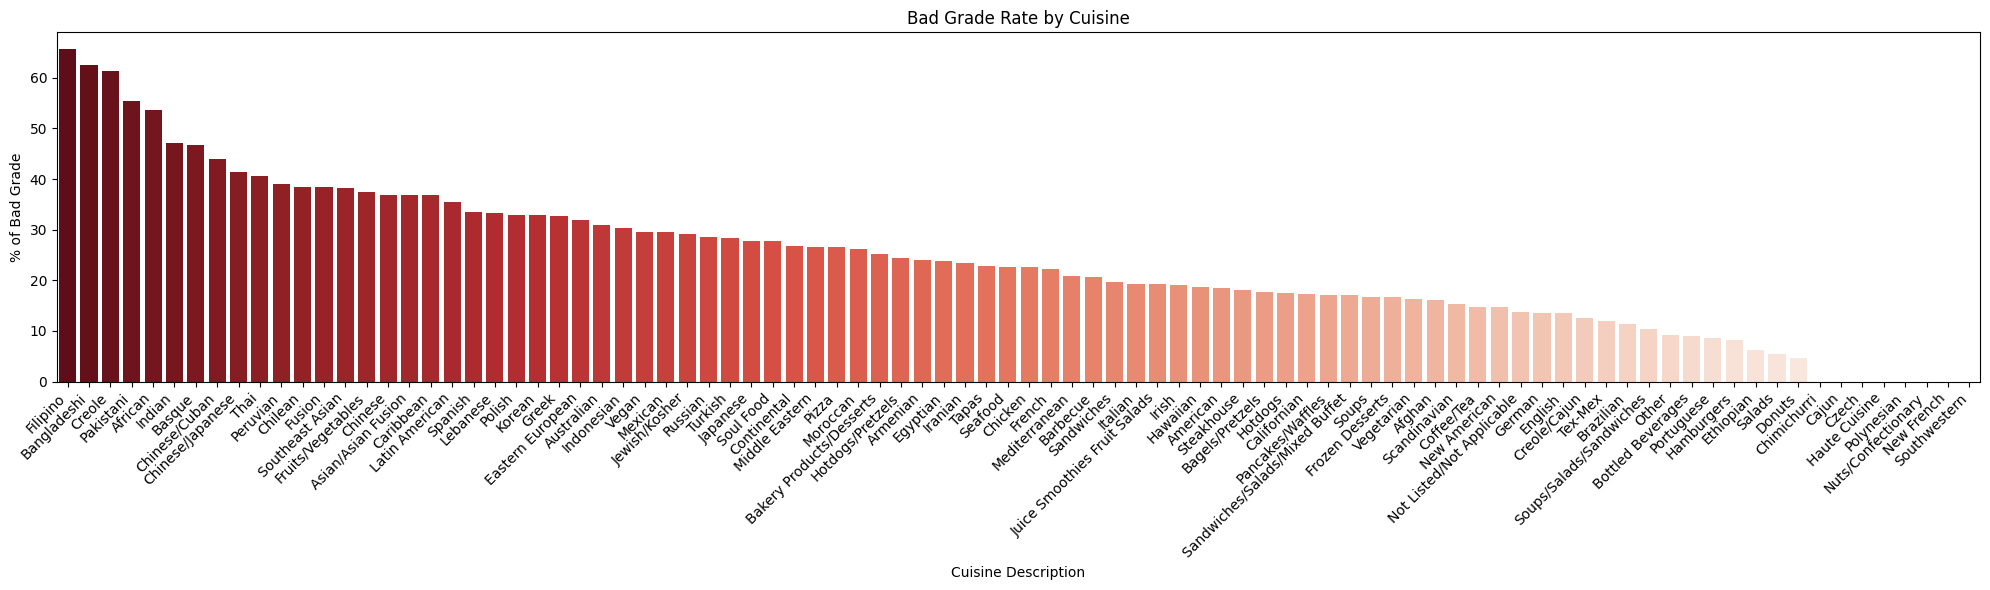

In [ ]:
# Plot cuisine bad grade analysis
crit_rate_sorted = bad_rate.sort_values("bad grade %", ascending=False)

plt.figure(figsize=(20,6))
sns.barplot(
    data=crit_rate_sorted,
    x="cuisine_description",
    y="bad grade %",
    hue="cuisine_description",
    palette="Reds_r"
)
plt.xticks(rotation=45, ha='right')
plt.ylabel("% of Bad Grade")
plt.xlabel("Cuisine Description")
plt.title("Bad Grade Rate by Cuisine")
plt.tight_layout()
plt.show()


In [ ]:
print(df[df['cuisine_description']=='Czech'])

           camis                          dba    boro     street       phone  \
3971    41485121  BOHEMIAN HALL & BEER GARDEN  Queens  24 AVENUE  7182744925   
4395    40812870                       KOLIBA  Queens  23 AVENUE  7186260430   
52726   40812870                       KOLIBA  Queens  23 AVENUE  7186260430   
61601   40812870                       KOLIBA  Queens  23 AVENUE  7186260430   
87403   41485121  BOHEMIAN HALL & BEER GARDEN  Queens  24 AVENUE  7182744925   
123725  41485121  BOHEMIAN HALL & BEER GARDEN  Queens  24 AVENUE  7182744925   
125454  41485121  BOHEMIAN HALL & BEER GARDEN  Queens  24 AVENUE  7182744925   
128753  41485121  BOHEMIAN HALL & BEER GARDEN  Queens  24 AVENUE  7182744925   
139803  41485121  BOHEMIAN HALL & BEER GARDEN  Queens  24 AVENUE  7182744925   
202178  40812870                       KOLIBA  Queens  23 AVENUE  7186260430   
218477  41485121  BOHEMIAN HALL & BEER GARDEN  Queens  24 AVENUE  7182744925   
239321  41485121  BOHEMIAN HALL & BEER G

In this analysis, bad grade % shows the percentage of restaurants that have grades below A in a specific cuisine, while critical % shows the percentage of restaurants that receive critical violations. Interestingly, it's possible for a restaurant to receive a critical violation but still receive an A rating. For example, Czech restaurants have the highest percentage of critical violations, yet all the restaurants have A ratings. This might be due to it having a small sample size (only 15 restaurants in the whole city).

However, this raises an interesting question for customers: Is an A rating a reliable indicator of whether a restaurant can achieve this even with critical violations (as a reminder, critical violations are those most likely to contribute to food-borne illness)? Therefore, this analysis combines both metrics for the audience to understand and weigh in on their preference.


## Seasonality: Are there seasonal or holiday-related spikes in food safety violations?

In [ ]:
# Group by season
df['is_critical'] = df['critical_flag'].str.upper() == 'CRITICAL'
seasonal_summary = (
    df.groupby('inspection_season')['is_critical'].mean().mul(100).round(1)
      .reset_index().rename(columns={'is_critical': 'critical %'})
      .sort_values(by='critical %', ascending=False))

print(seasonal_summary)

  inspection_season  critical %
2            Summer        54.2
0              Fall        53.8
1            Spring        53.1
3            Winter        52.9


/tmp/ipython-input-1283533020.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('inspection_season')['is_critical'].mean().mul(100).round(1)


In [ ]:
# Count of inspections by season
season_counts = (df.groupby('inspection_season')['inspection_date']
      .count().reset_index().rename(columns={'inspection_date': 'inspection_count'}))
season_counts = season_counts.sort_values('inspection_count', ascending=False)
print(season_counts)

  inspection_season  inspection_count
1            Spring             77638
0              Fall             77085
2            Summer             71784
3            Winter             62267


/tmp/ipython-input-2056210376.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_counts = (df.groupby('inspection_season')['inspection_date']


Despite spring being the season with the highest inspection count, summer has the highest percentage of restaurants receiving critical violations, and winter has the lowest percentage.

This is most likely due to food spoilage is very sensitive to temperature, and higher summer temperatures can accelerate spoilage if food is not stored properly.